In [10]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,bernoulli, exponnorm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib.ticker import FuncFormatter
import warnings
import csv
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
#Importing the data
houses_df = pd.read_csv('./data/house_prices_train.csv')

In [12]:
feature_desc = {"SalePrice":"the property's sale price in dollars",
"MSSubClass":"The building class",
"MSZoning":"The general zoning classification",
"LotFrontage":"Linear feet of street connected to property",
"LotArea":"Lot size in square feet",
"Street":"Type of road access",
"Alley":"Type of alley access",
"LotShape":"General shape of property",
"LandContour":"Flatness of the property",
"Utilities":"Type of utilities available",
"LotConfig":"Lot configuration",
"LandSlope":"Slope of property",
"Neighborhood":"Physical locations within Ames city limits",
"Condition1":"Proximity to main road or railroad",
"Condition2":"Proximity to main road or railroad (if a second is present)",
"BldgType":"Type of dwelling",
"HouseStyle":"Style of dwelling",
"OverallQual":"Overall material and finish quality",
"OverallCond":"Overall condition rating",
"YearBuilt":"Original construction date",
"YearRemodAdd":"Remodel date",
"RoofStyle":"Type of roof",
"RoofMatl":"Roof material",
"Exterior1st":"Exterior covering on house",
"Exterior2nd":"Exterior covering on house (if more than one material)",
"MasVnrType":"Masonry veneer type",
"MasVnrArea":"Masonry veneer area in square feet",
"ExterQual":"Exterior material quality",
"ExterCond":"Present condition of the material on the exterior",
"Foundation":"Type of foundation",
"BsmtQual":"Height of the basement",
"BsmtCond":"General condition of the basement",
"BsmtExposure":"Walkout or garden level basement walls",
"BsmtFinType1":"Quality of basement finished area",
"BsmtFinSF1":"Type 1 finished square feet",
"BsmtFinType2":"Quality of second finished area (if present)",
"BsmtFinSF2":"Type 2 finished square feet",
"BsmtUnfSF":"Unfinished square feet of basement area",
"TotalBsmtSF":"Total square feet of basement area",
"Heating":"Type of heating",
"HeatingQC":"Heating quality and condition",
"CentralAir":"Central air conditioning",
"Electrical":"Electrical system",
"1stFlrSF":"First Floor square feet",
"2ndFlrSF":"Second floor square feet",
"LowQualFinSF":"Low quality finished square feet (all floors)",
"GrLivArea":"Above grade (ground) living area square feet",
"BsmtFullBath":"Basement full bathrooms",
"BsmtHalfBath":"Basement half bathrooms",
"FullBath":"Full bathrooms above grade",
"HalfBath":"Half baths above grade",
"Bedroom":"Number of bedrooms above basement level",
"Kitchen":"Number of kitchens",
"KitchenQual":"Kitchen quality",
"TotRmsAbvGrd":"Total rooms above grade (does not include bathrooms)",
"Functional":"Home functionality rating",
"Fireplaces":"Number of fireplaces",
"FireplaceQu":"Fireplace quality",
"GarageType":"Garage location",
"GarageYrBlt":"Year garage was built",
"GarageFinish":"Interior finish of the garage",
"GarageCars":"Size of garage in car capacity",
"GarageArea":"Size of garage in square feet",
"GarageQual":"Garage quality",
"GarageCond":"Garage condition",
"PavedDrive":"Paved driveway",
"WoodDeckSF":"Wood deck area in square feet",
"OpenPorchSF":"Open porch area in square feet",
"EnclosedPorch":"Enclosed porch area in square feet",
"3SsnPorch":"Three season porch area in square feet",
"ScreenPorch":"Screen porch area in square feet",
"PoolArea":"Pool area in square feet",
"PoolQC":"Pool quality",
"Fence":"Fence quality",
"MiscFeature":"Miscellaneous feature not covered in other categories",
"MiscVal":"$Value of miscellaneous feature",
"MoSold":"Month Sold",
"YrSold":"Year Sold",
"SaleType":"Type of sale",
"SaleCondition":"Condition of sale"}

In [13]:
#There too many columns
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
houses_df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Let's focus on "SalePrice"

In [15]:
houses_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


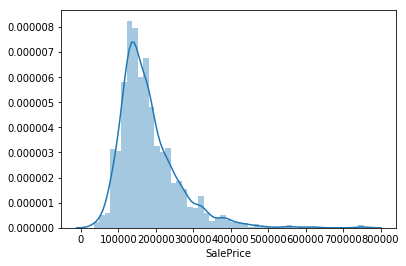

In [16]:
#histogram
sns.distplot(houses_df['SalePrice']);
print("Skewness: %f" % houses_df['SalePrice'].skew())
print("Kurtosis: %f" % houses_df['SalePrice'].kurt())

In [21]:
houses_df.corr().loc[:,'SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

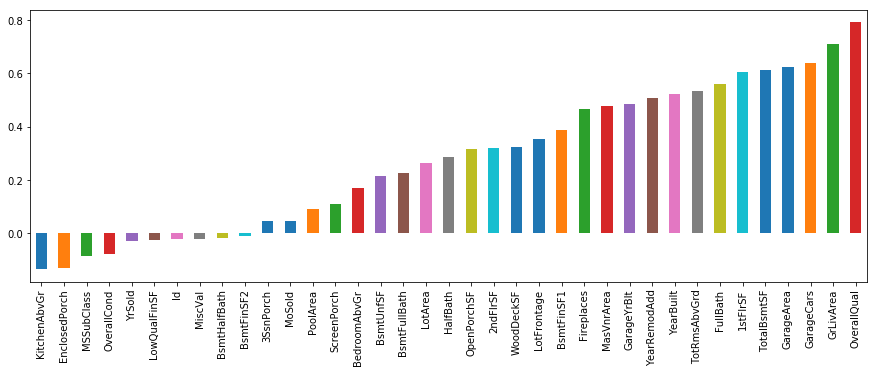

In [17]:
plt.figure(figsize=(15,5))
houses_df.corr().iloc[-1, 0:-1].sort_values().plot.bar()
plt.show()

In [9]:
corr_list = list(houses_df.corr().iloc[-1, 0:-1].sort_values(ascending=False)[:9].index)
corr_list

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [86]:
corr = houses_df.corr()

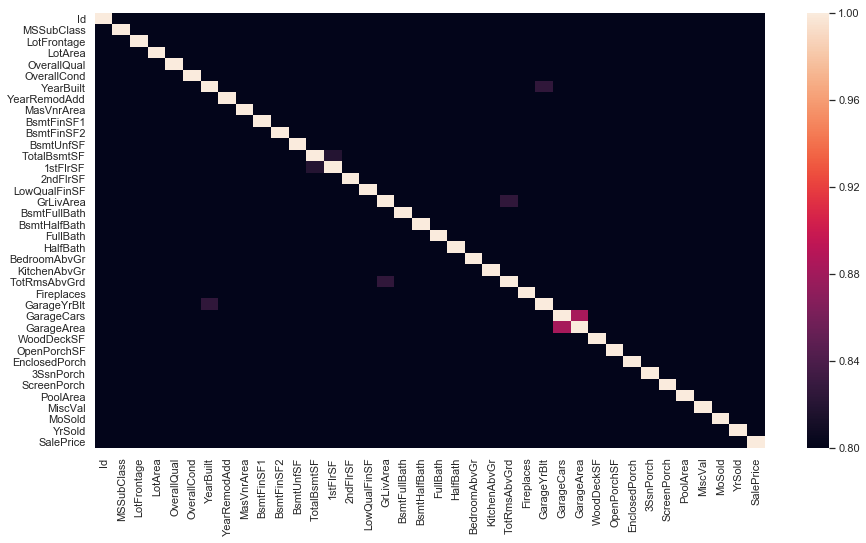

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, vmin=0.80)

In [10]:
numerical_features = houses_df.dtypes[houses_df.dtypes != "object"].index
categoricel_features = houses_df.dtypes[houses_df.dtypes == "object"].index

### Relationship with numerical variables

In [11]:
categoricel_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

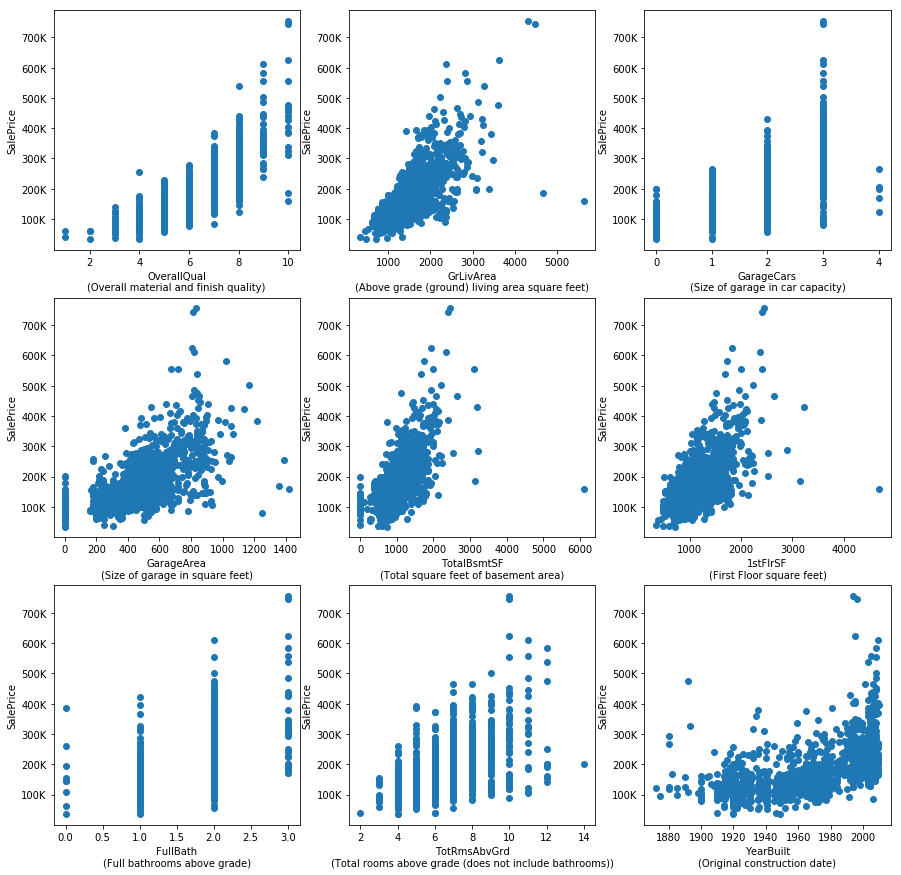

In [12]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(corr_list):
    plt.subplot(3,3,i+1)
    plt.scatter(houses_df[feature], houses_df["SalePrice"])
    plt.xlabel((feature + "\n(" + feature_desc[feature] + ")"))
    plt.yticks(np.arange(1e5, 8e5, step=1e5), ['100K', '200K', '300K', '400K', 
                                               '500K', '600K', '700K', ])
    plt.ylabel("SalePrice")

### Relationship with categorical features

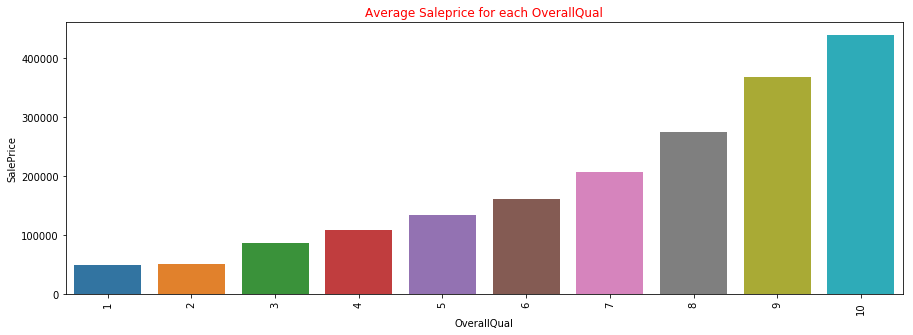

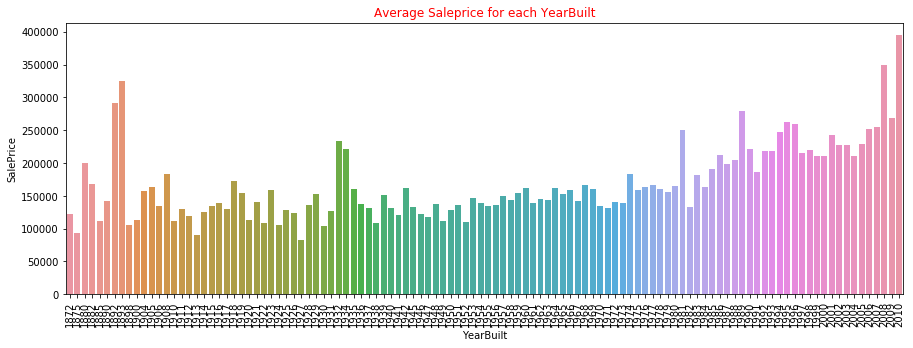

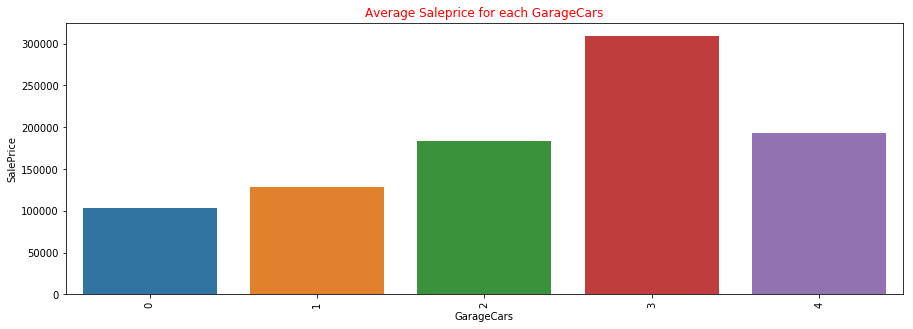

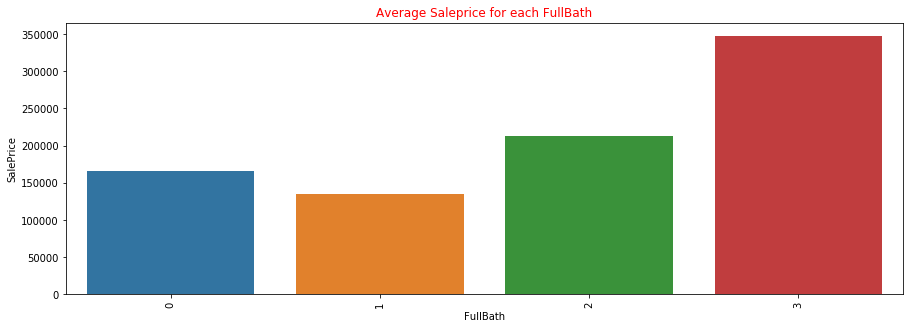

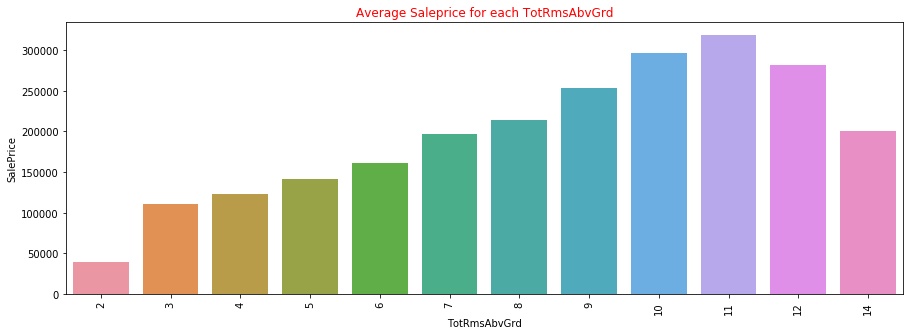

In [13]:
categ_cols = ["OverallQual", "YearBuilt", "GarageCars", 'FullBath', 'TotRmsAbvGrd']
for col in categ_cols:
    plt.figure(figsize=(15,5))
    mean_by_qual = houses_df.groupby(by=col).mean()
    sns.barplot(mean_by_qual.index, mean_by_qual.SalePrice)
    plt.xticks(rotation=90)
    plt.title("Average Saleprice for each {}".format(col), color="red")
    plt.show()

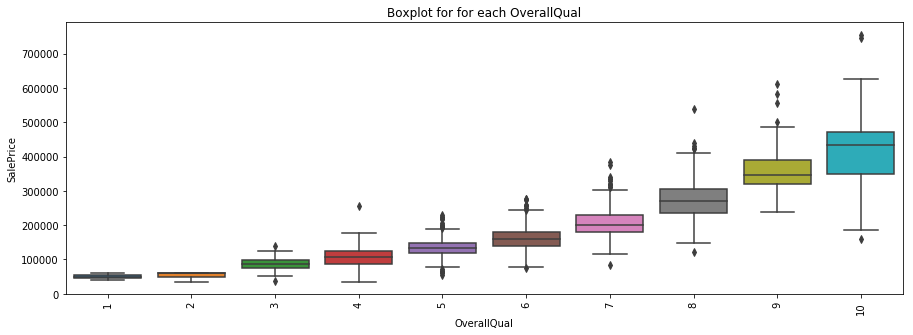

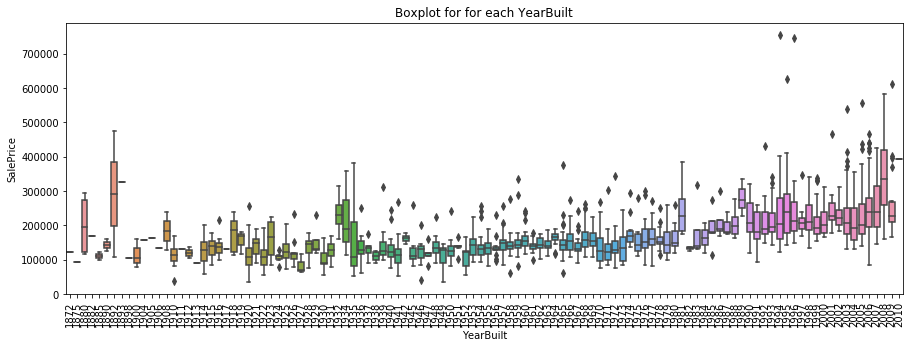

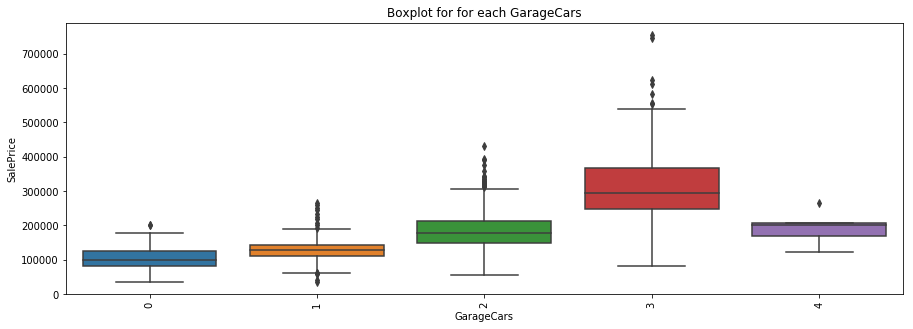

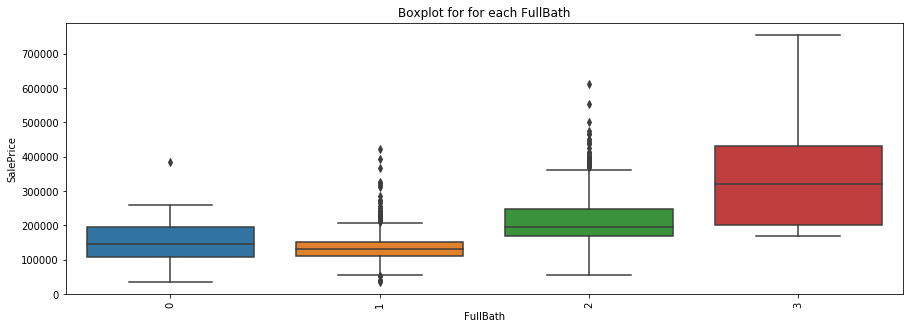

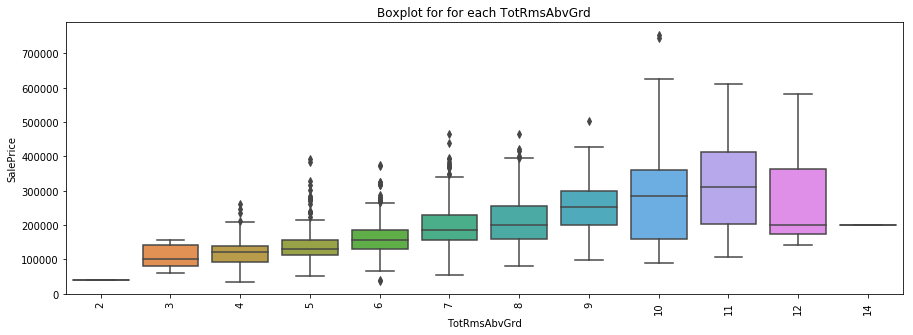

In [14]:
categ_cols = ["OverallQual", "YearBuilt", "GarageCars", 'FullBath', 'TotRmsAbvGrd']
for col in categ_cols:
    plt.figure(figsize=(15,5))
    #mean_by_qual = houses_df.groupby(by=col).mean()
    sns.boxplot(x=col, y="SalePrice", data=houses_df)
    plt.xticks(rotation=90)
    plt.title("Boxplot for for each {}".format(col))
    plt.show()

# Correlation matrix (heatmap style)¶

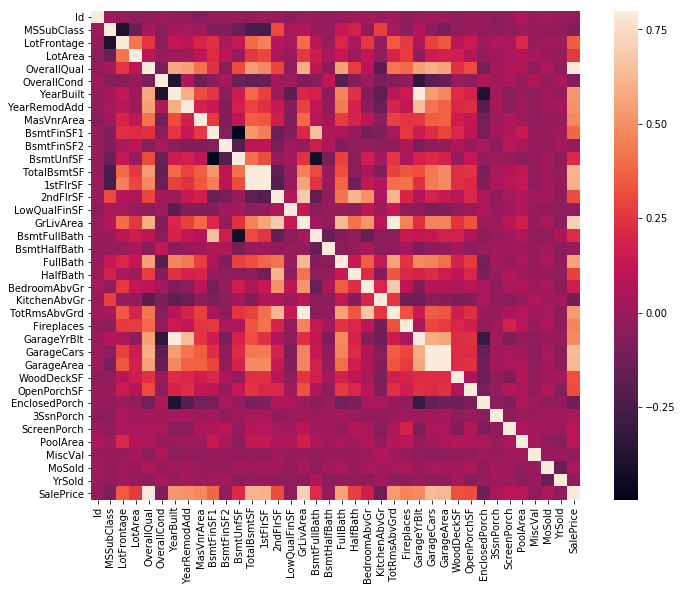

In [15]:
#correlation matrix
corrmat = houses_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## 'SalePrice' correlation matrix (zoomed heatmap style)

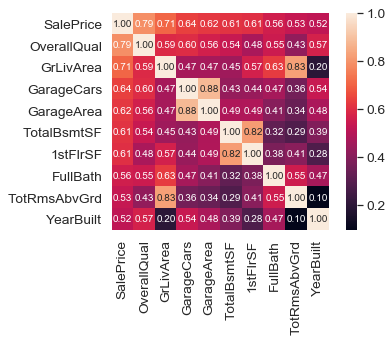

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houses_df[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

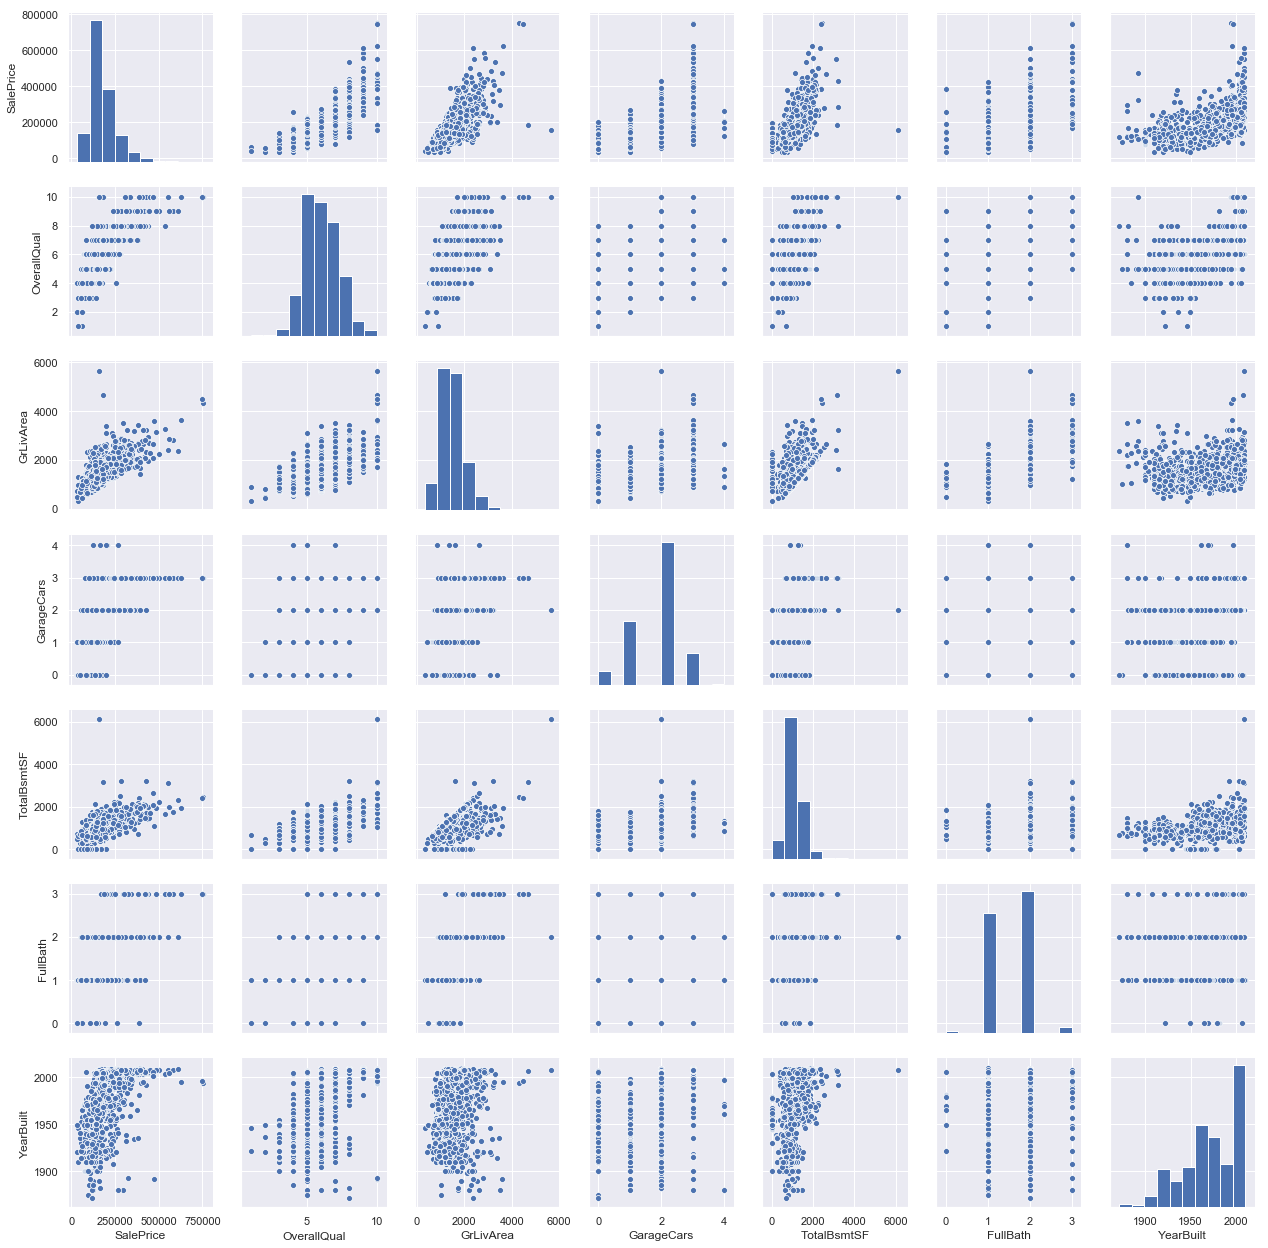

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(houses_df[cols], size = 2.5)
plt.show();

# 4. Missing data

In [18]:
#missing data
total = houses_df.isnull().sum().sort_values(ascending=False)
percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [19]:
missing_features= list(missing_data[missing_data.Total>0].index)

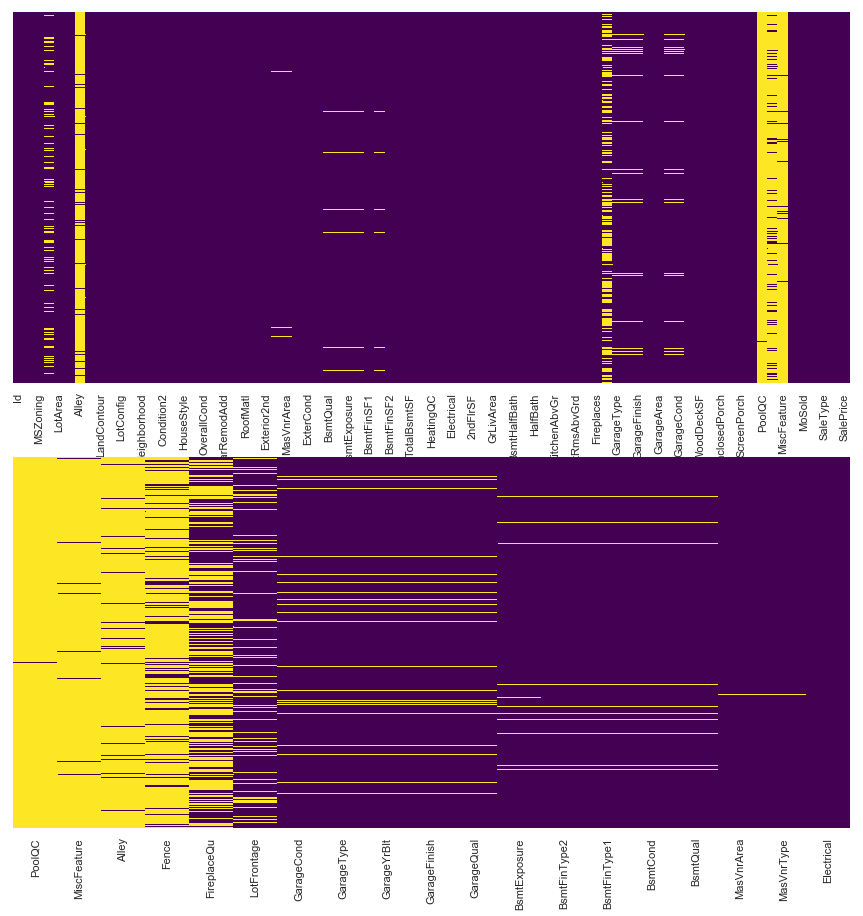

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(211)
sns.heatmap(houses_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.subplot(212)
sns.heatmap(houses_df[missing_features].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [21]:
#dealing with missing data
houses_df = houses_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
houses_df = houses_df.drop(houses_df.loc[houses_df['Electrical'].isnull()].index)

# Outliers

In [23]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(houses_df['SalePrice'][:,np.newaxis]);
lows = np.array(sorted(saleprice_scaled[:,0])[:20])
highs = np.array(sorted(saleprice_scaled[:,0], reverse=True)[:20])
#low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:20]
#high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(lows)
print('\nouter range (high) of the distribution:')
print(highs)

outer range (low) of the distribution:
[-1.83820775 -1.83303414 -1.80044422 -1.78282123 -1.77400974 -1.62295562
 -1.6166617  -1.58519209 -1.58519209 -1.57269236 -1.54113464 -1.52225288
 -1.52225288 -1.52225288 -1.50966503 -1.49225604 -1.46560758 -1.44043189
 -1.43413797 -1.43413797]

outer range (high) of the distribution:
[7.22629831 7.10041987 5.58987866 5.42191907 5.06034585 4.728631
 4.70872962 4.49473628 4.0395221  3.82758058 3.70170215 3.59470548
 3.57582371 3.41155236 3.33994012 3.26112763 3.24577046 3.22530263
 3.13524919 3.08489782]


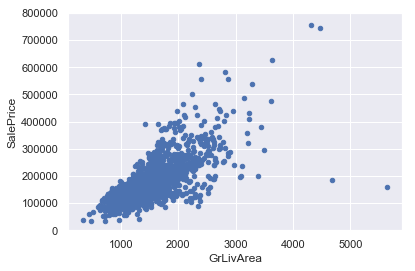

In [24]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([houses_df['SalePrice'], houses_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [25]:
#deleting points
houses_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [26]:
#deleting points
houses_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
houses_df = houses_df.drop(houses_df[houses_df['Id'] == 1299].index)
houses_df = houses_df.drop(houses_df[houses_df['Id'] == 524].index)

### In the search for normality

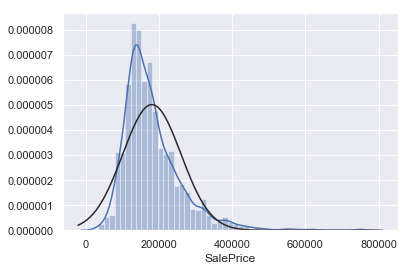

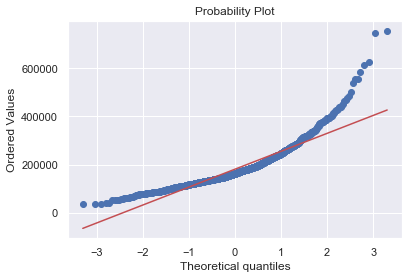

In [27]:
#histogram and normal probability plot
sns.distplot(houses_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df['SalePrice'], plot=plt)

In [28]:
#applying log transformation
houses_df['SalePrice'] = np.log(houses_df['SalePrice'])

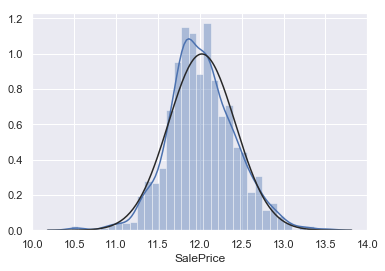

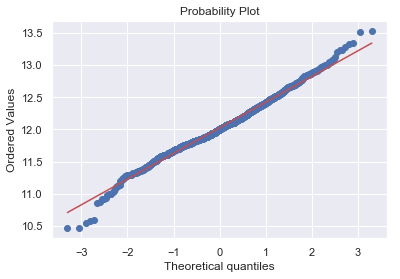

In [29]:
#transformed histogram and normal probability plot
sns.distplot(houses_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df['SalePrice'], plot=plt)

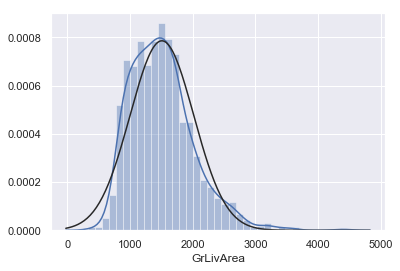

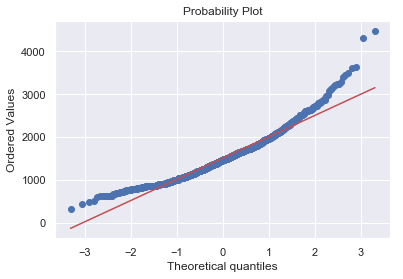

In [30]:
#histogram and normal probability plot
sns.distplot(houses_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df['GrLivArea'], plot=plt)

In [31]:
#data transformation
houses_df['GrLivArea'] = np.log(houses_df['GrLivArea'])

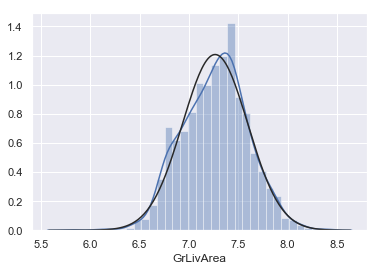

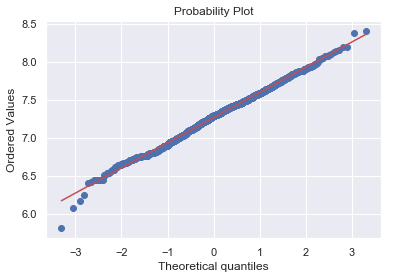

In [32]:
#transformed histogram and normal probability plot
sns.distplot(houses_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df['GrLivArea'], plot=plt)

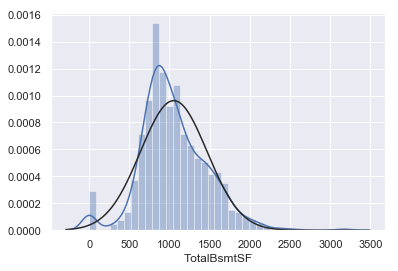

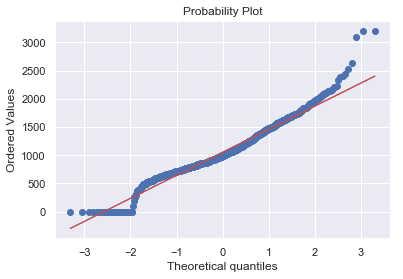

In [33]:
#histogram and normal probability plot
sns.distplot(houses_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df['TotalBsmtSF'], plot=plt)

In [34]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
houses_df['HasBsmt'] = pd.Series(len(houses_df['TotalBsmtSF']), index=houses_df.index)
houses_df['HasBsmt'] = 0 
houses_df.loc[houses_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [35]:
#transform data
houses_df.loc[houses_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(houses_df['TotalBsmtSF'])

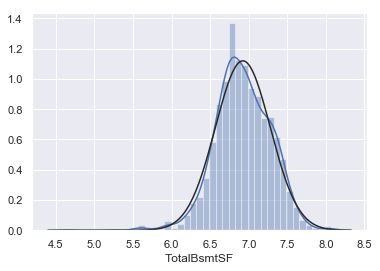

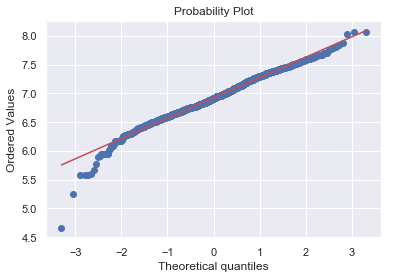

In [36]:
#histogram and normal probability plot
sns.distplot(houses_df[houses_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(houses_df[houses_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

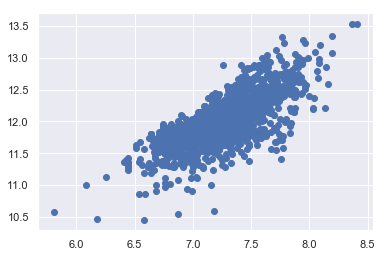

In [37]:
#scatter plot
plt.scatter(houses_df['GrLivArea'], houses_df['SalePrice']);

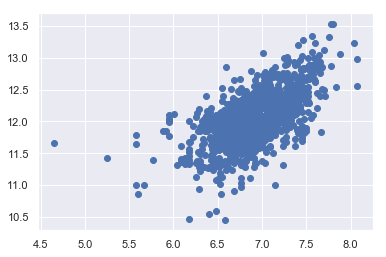

In [38]:
#scatter plot
plt.scatter(houses_df[houses_df['TotalBsmtSF']>0]['TotalBsmtSF'], 
            houses_df[houses_df['TotalBsmtSF']>0]['SalePrice']);

In [39]:
#convert categorical variable into dummy
houses_df = pd.get_dummies(houses_df)